In [15]:
from scipy import stats
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Bayes Theorem of Conditional Probability
Before we dive into Bayes theorem, let’s review marginal, joint, and conditional probability.

Recall that marginal probability is the probability of an event, irrespective of other random variables. If the random variable is independent, then it is the probability of the event directly, otherwise, if the variable is dependent upon other variables, then the marginal probability is the probability of the event summed over all outcomes for the dependent variables, called the sum rule.

 - __Marginal Probability__: The probability of an event irrespective of the outcomes of other random variables, e.g. P(A).
 
The joint probability is the probability of two (or more) simultaneous events, often described in terms of events A and B from two dependent random variables, e.g. X and Y. The joint probability is often summarized as just the outcomes, e.g. A and B.

 - __Joint Probability__: Probability of two (or more) simultaneous events, e.g. P(A and B) or P(A, B).

The conditional probability is the probability of one event given the occurrence of another event, often described in terms of events A and B from two dependent random variables e.g. X and Y.

- __Conditional Probability__: Probability of one (or more) event given the occurrence of another event, e.g. P(A given B) or P(A | B).

The joint probability can be calculated using the conditional probability; for example:

$P(A, B) = P(A | B) * P(B)$

This is called the product rule. Importantly, the joint probability is symmetrical, meaning that:

$P(A, B) = P(B, A)$

The conditional probability can be calculated using the joint probability; for example:

$P(A | B) = P(A, B) / P(B)$

The conditional probability is not symmetrical; for example:

$P(A | B) != P(B | A)$

We are now up to speed with marginal, joint and conditional probability. If you would like more background on these fundamentals, see the tutorial:

 - __[A Gentle Introduction to Joint, Marginal, and Conditional Probability](https://machinelearningmastery.com/joint-marginal-and-conditional-probability-for-machine-learning/)__

# An Alternate Way To Calculate Conditional Probability

Now, there is another way to calculate the conditional probability.

Specifically, one conditional probability can be calculated using the other conditional probability; for example:

$P(A|B) = P(B|A) * P(A) / P(B)$

The reverse is also true; for example:

$P(B|A) = P(A|B) * P(B) / P(A)$

This alternate approach of calculating the conditional probability is useful either when the joint probability is challenging to calculate (which is most of the time), or when the reverse conditional probability is available or easy to calculate.

This alternate calculation of the conditional probability is referred to as Bayes Rule or Bayes Theorem, named for Reverend Thomas Bayes, who is credited with first describing it. It is grammatically correct to refer to it as Bayes’ Theorem (with the apostrophe), but it is common to omit the apostrophe for simplicity.

 - __Bayes Theorem__: Principled way of calculating a conditional probability without the joint probability.
It is often the case that we do not have access to the denominator directly, e.g. P(B).

We can calculate it an alternative way; for example:

$P(B) = P(B|A) * P(A) + P(B|not A) * P(not A)$

This gives a formulation of Bayes Theorem that we can use that uses the alternate calculation of P(B), described below:

$P(A|B) = P(B|A) * P(A) / P(B|A) * P(A) + P(B|not A) * P(not A)$

Or with brackets around the denominator for clarity:

$P(A|B) = P(B|A) * P(A) / (P(B|A) * P(A) + P(B|not A) * P(not A))$

Note: the denominator is simply the expansion we gave above.

As such, if we have P(A), then we can calculate P(not A) as its complement; for example:

$P(not A) = 1 – P(A)$

Additionally, if we have P(not B|not A), then we can calculate P(B|not A) as its complement; for example:

$P(B|not A) = 1 – P(not B|not A)$

Now that we are familiar with the calculation of Bayes Theorem, let’s take a closer look at the meaning of the terms in the equation.

# Naming the Terms in the Theorem

The terms in the Bayes Theorem equation are given names depending on the context where the equation is used.

It can be helpful to think about the calculation from these different perspectives and help to map your problem onto the equation.

Firstly, in general, the result P(A|B) is referred to as the posterior probability and P(A) is referred to as the prior probability.

$P(A|B): Posterior probability.$
$P(A): Prior probability.$

Sometimes P(B|A) is referred to as the likelihood and P(B) is referred to as the evidence.

$P(B|A): Likelihood.$

$P(B): Evidence.$

This allows Bayes Theorem to be restated as:

Posterior = Likelihood * Prior / Evidence
We can make this clear with a smoke and fire case.

> __What is the probability that there is fire given that there is smoke?__

Where P(Fire) is the Prior, P(Smoke|Fire) is the Likelihood, and P(Smoke) is the evidence:

$P(Fire|Smoke) = P(Smoke|Fire) * P(Fire) / P(Smoke)$

You can imagine the same situation with rain and clouds.

Now that we are familiar with Bayes Theorem and the meaning of the terms, let’s look at a scenario where we can calculate it.

# Naive Bayes Classifier

The solution to using Bayes Theorem for a conditional probability classification model is to simplify the calculation.

The Bayes Theorem assumes that each input variable is dependent upon all other variables. This is a cause of complexity in the calculation. We can remove this assumption and consider each input variable as being independent from each other.

This changes the model from a dependent conditional probability model to an independent conditional probability model and dramatically simplifies the calculation.

This means that we calculate P(data|class) for each input variable separately and multiple the results together, for example:

$P(class | X1, X2, …, Xn) = P(X1|class) * P(X2|class) * … * P(Xn|class) * P(class) / P(data)$

We can also drop the probability of observing the data as it is a constant for all calculations, for example:

$P(class | X1, X2, …, Xn) = P(X1|class) * P(X2|class) * … * P(Xn|class) * P(class)$

This simplification of Bayes Theorem is common and widely used for classification predictive modeling problems and is generally referred to as Naive Bayes.

The word “naive” is French and typically has a diaeresis (umlaut) over the “i”, which is commonly left out for simplicity, and “Bayes” is capitalized as it is named for Reverend Thomas Bayes.

For tutorials on how to implement Naive Bayes from scratch in Python see:

 - __[How to Develop a Naive Bayes Classifier from Scratch in Python](https://machinelearningmastery.com/classification-as-conditional-probability-and-the-naive-bayes-algorithm/)__

In [59]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1)
prob = np.ones((len(X)))
for i in range(len(X[0])):
    kde = stats.gaussian_kde(X[y==1,i])
    prob *= kde(X[:,i])
prob *= 0.5

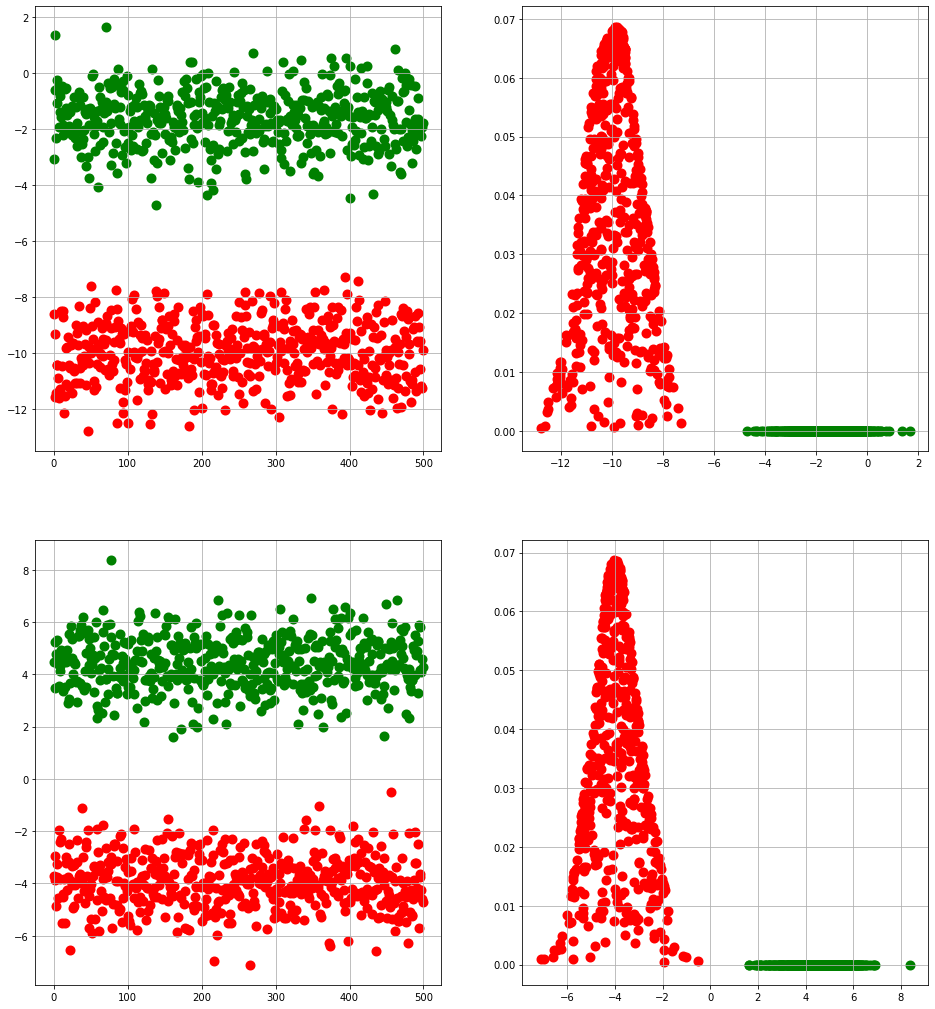

In [60]:
fig = plt.figure(figsize=[16,9*2])
ax = fig.subplots(2,2)
        
ax[0,0].scatter([i for i in range(len(X[y==0,0]))], X[y==0,0], color ='g', linewidth=4)
ax[0,0].scatter([i for i in range(len(X[y==1,0]))], X[y==1,0], color ='r', linewidth=4)
ax[0,1].scatter(X[y==0,0], prob[y==0],color = 'g', linewidth=4)
ax[0,1].scatter(X[y==1,0], prob[y==1],color = 'r', linewidth=4)

ax[0,0].grid()
ax[0,1].grid()

ax[1,0].scatter([i for i in range(len(X[y==0,1]))], X[y==0,1], color ='g', linewidth=4)
ax[1,0].scatter([i for i in range(len(X[y==1,1]))], X[y==1,1], color ='r', linewidth=4)
ax[1,1].scatter(X[y==0,1], prob[y==0],color = 'g', linewidth=4)
ax[1,1].scatter(X[y==1,1], prob[y==1],color = 'r', linewidth=4)

ax[1,0].grid()
ax[1,1].grid()